# FllExploratory Data Analysis (EDA) for Claim Data in Auto Insurance Field
## Yijun, Brenna, Ting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("Car_Insurance_Claim.csv")
df = df.drop(['ID'], axis=1)
df.isnull().sum()
df = df.fillna(df.mean())   

df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [3]:
df.loc[df['POSTAL_CODE']==10238,'AREA'] = 'New York, NY, US'
df.loc[df['POSTAL_CODE']==32765,'AREA'] = 'Oviedo, FL, US'
df.loc[df['POSTAL_CODE']==92101,'AREA'] = 'San Diego, CA, US'
df.loc[df['POSTAL_CODE']==21217,'AREA'] = ' Baltimorem, MD, US'


In [4]:
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AREA
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0,"New York, NY, US"
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0,"New York, NY, US"
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0,"New York, NY, US"
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0,"Oviedo, FL, US"
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0,"Oviedo, FL, US"


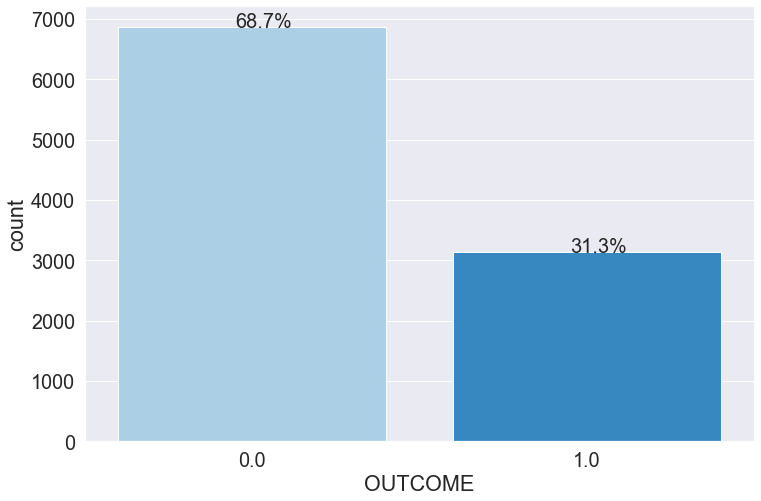

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [5]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 20)
    plt.show()
sns.set(font_scale=1.8)   
plt.figure(figsize = (12,8))
ax = sns.countplot(x='OUTCOME', data=df, saturation = 4.5, palette = 'Blues')
without_hue(ax,df.OUTCOME)
df.OUTCOME.value_counts()

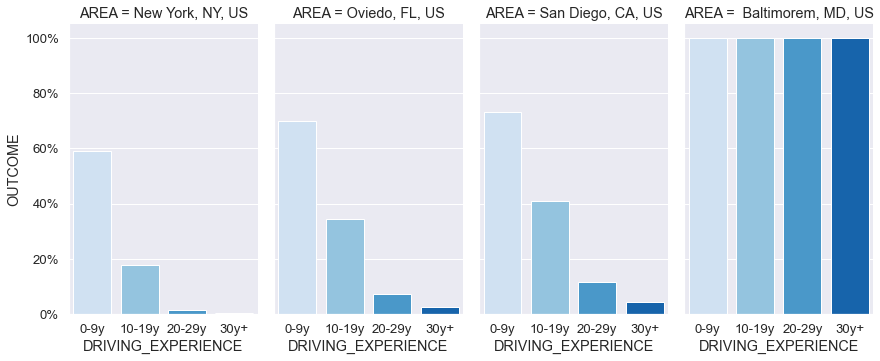

In [6]:
sns.set(font_scale=1.2)  
from  matplotlib.ticker import PercentFormatter
g_1 = sns.catplot(x="DRIVING_EXPERIENCE", y="OUTCOME", col="AREA",
                 data=df, saturation=4.5,
                 kind="bar", ci=None, aspect=.6, palette="Blues")


for ax in g_1.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    
plt.show()

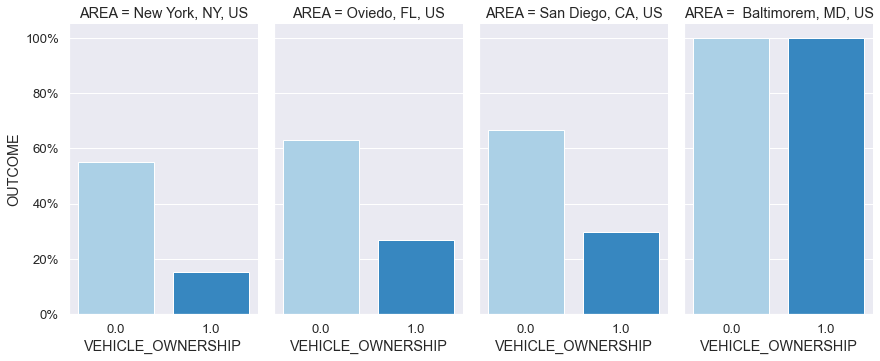

In [7]:
sns.set(font_scale=1.2)  
g_2 = sns.catplot(x="VEHICLE_OWNERSHIP", y="OUTCOME", col="AREA",
                 data=df, saturation=4.5,
                 kind="bar", ci=None, aspect=.6, palette="Blues")

for ax in g_2.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

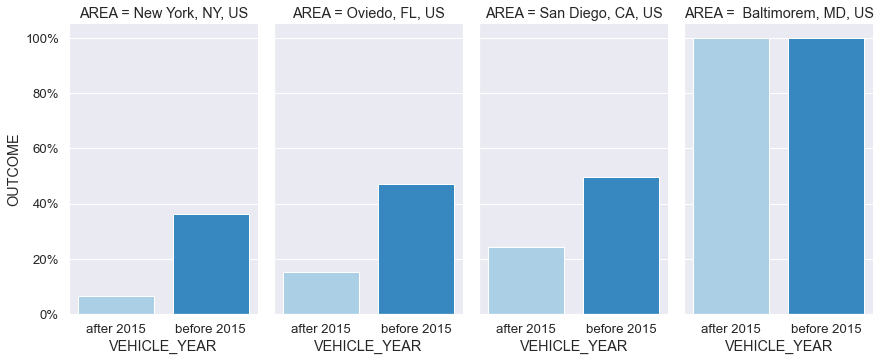

In [8]:
sns.set(font_scale=1.2)  
g_3 = sns.catplot(x="VEHICLE_YEAR", y="OUTCOME", col="AREA",
                 data=df, saturation=4.5,
                 kind="bar", ci=None, aspect=.6, palette="Blues")

for ax in g_3.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

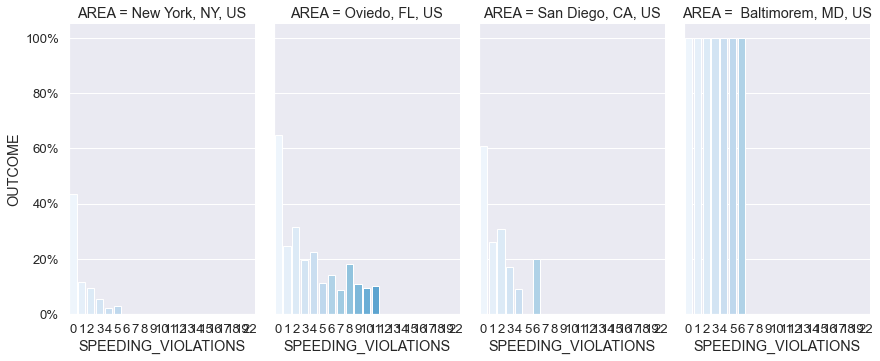

In [9]:
g_4 = sns.catplot(x="SPEEDING_VIOLATIONS", y="OUTCOME", col="AREA",
                 data=df, saturation=4.5,
                 kind="bar", ci=None, aspect=.6, palette="Blues")

for ax in g_4.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

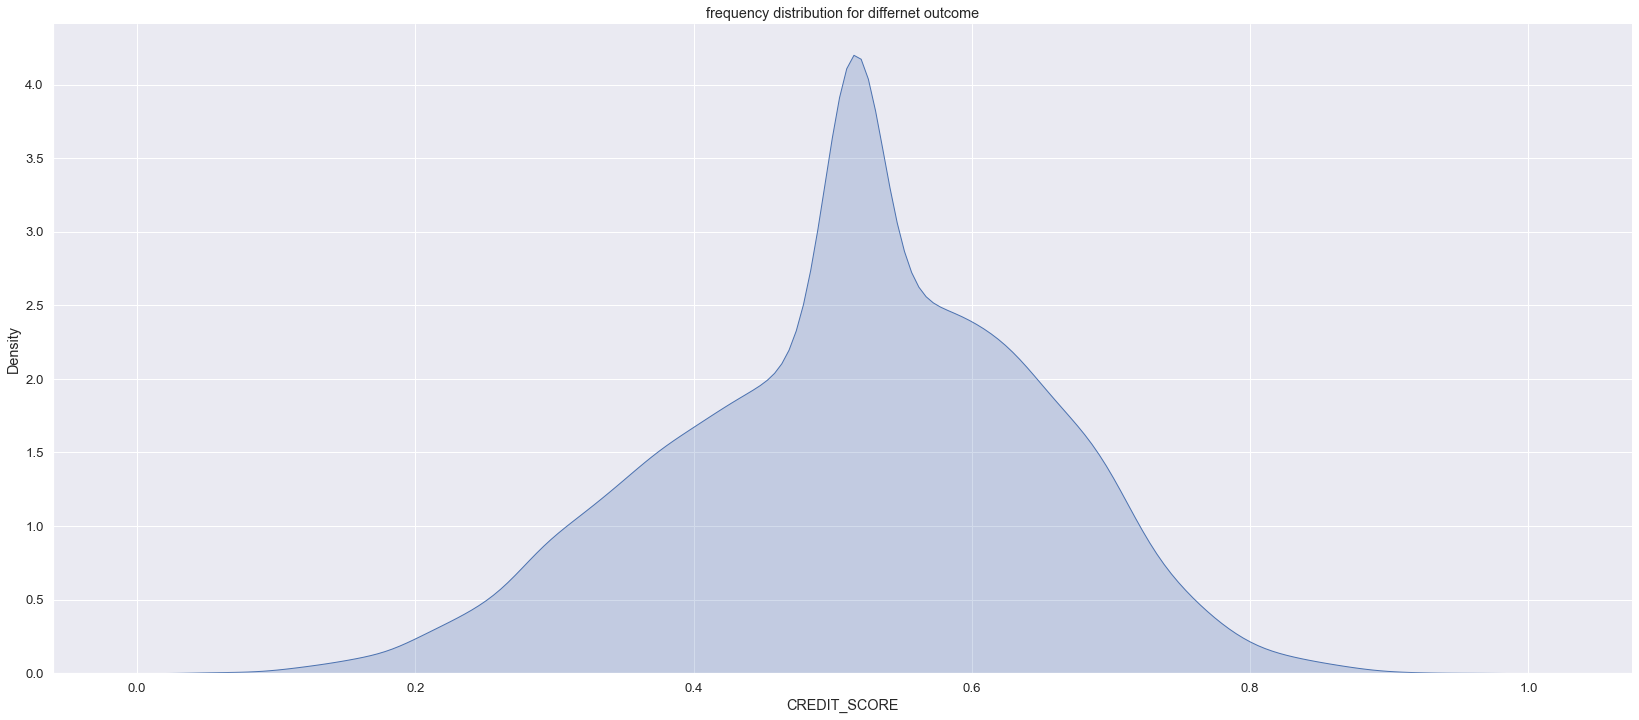

In [10]:
plt.figsize=(5, 2)
sns.displot(df, x="CREDIT_SCORE",
            kind="kde",height=10, aspect = 2.3, palette = "crest",fill=True)
plt.title("frequency distribution for differnet outcome")
plt.show()

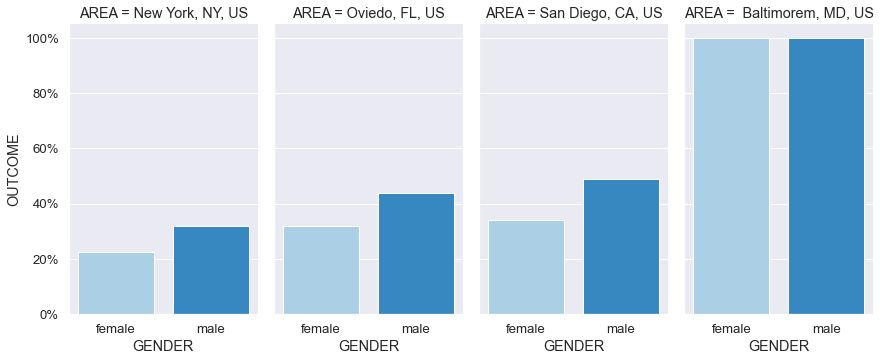

In [11]:
sns.set(font_scale=1.2)  
from  matplotlib.ticker import PercentFormatter
g_5 = sns.catplot(x="GENDER", y="OUTCOME", col="AREA",
                 data=df, saturation=4.5,
                 kind="bar", ci=None, aspect=.6, palette="Blues")


for ax in g_5.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    
plt.show()

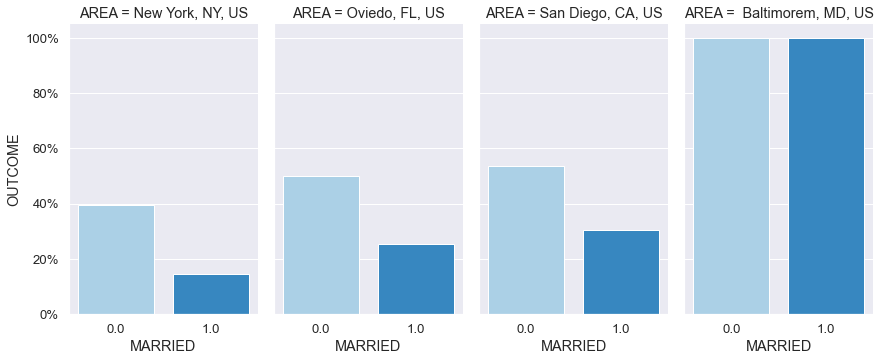

In [12]:
 sns.set(font_scale=1.2)  
from  matplotlib.ticker import PercentFormatter
g_6 = sns.catplot(x="MARRIED", y="OUTCOME", col="AREA",
                 data=df, saturation=4.5,
                 kind="bar", ci=None, aspect=.6, palette="Blues")


for ax in g_6.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    
plt.show()

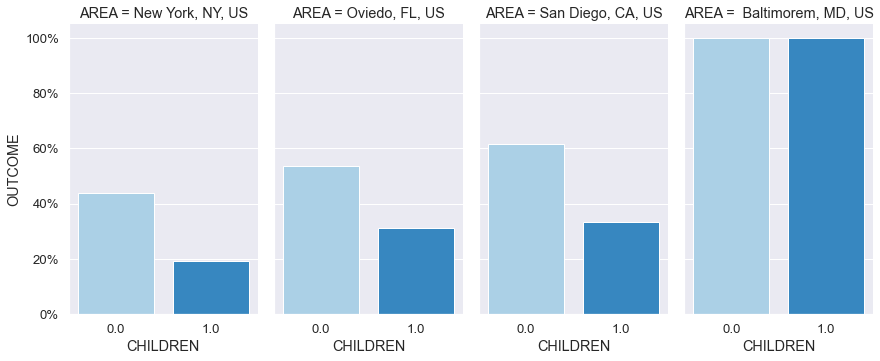

In [13]:
 sns.set(font_scale=1.2)  
from  matplotlib.ticker import PercentFormatter
g_7 = sns.catplot(x="CHILDREN", y="OUTCOME", col="AREA",
                 data=df, saturation=4.5,
                 kind="bar", ci=None, aspect=.6, palette="Blues")


for ax in g_7.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    
plt.show()

Text(0.5, 1.0, 'frequency distribution for differnet outcome')

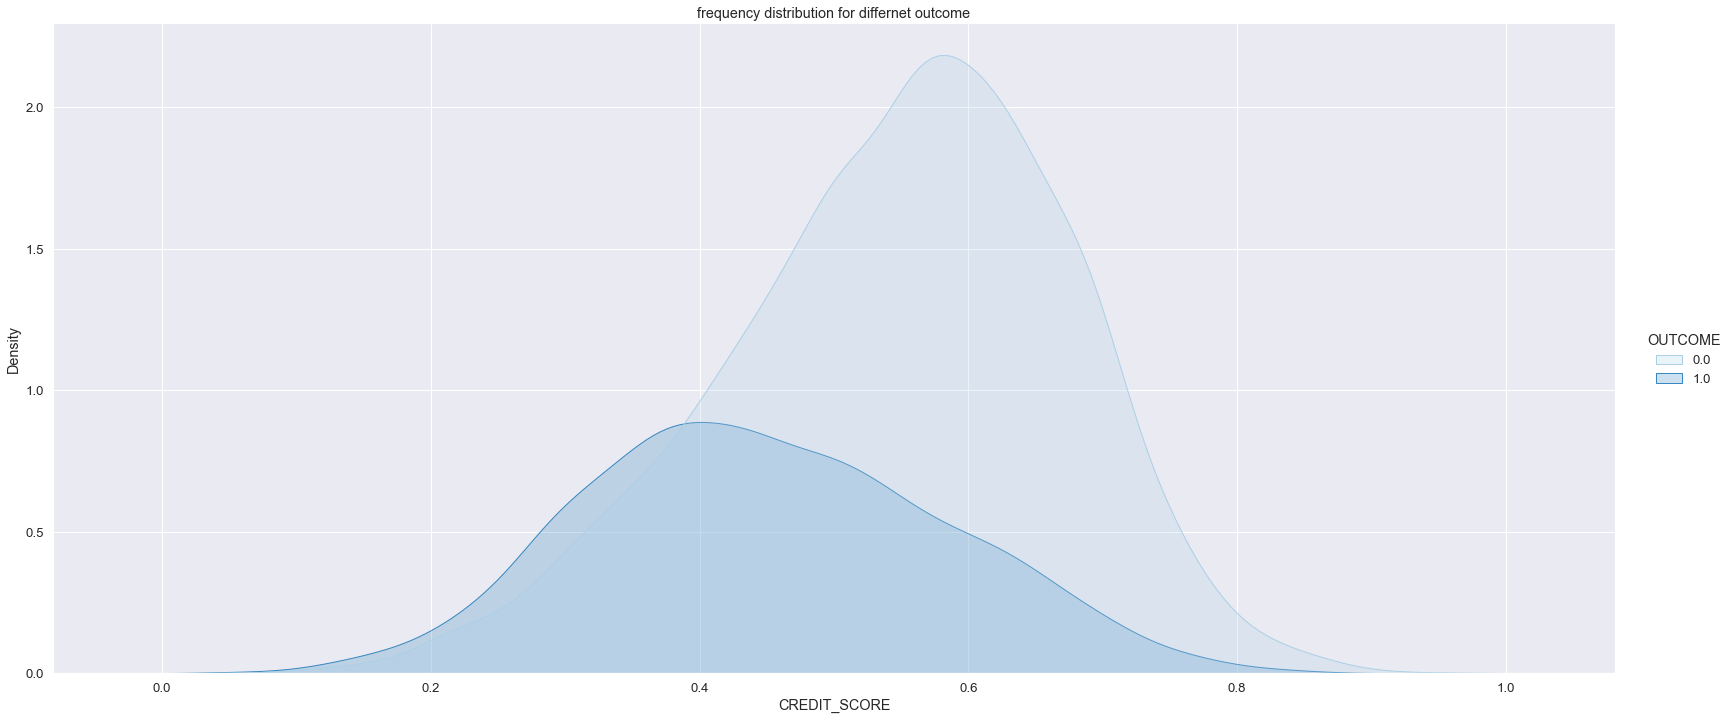

In [14]:
df = pd.read_csv("Car_Insurance_Claim.csv")
pic_1 = sns.displot(df, x="CREDIT_SCORE", hue="OUTCOME",
            kind="kde",height=10, aspect = 2.3, palette = "Blues",fill=True)
plt.title("frequency distribution for differnet outcome")

Text(0.5, 1.0, 'frequency distribution for differnet outcome')

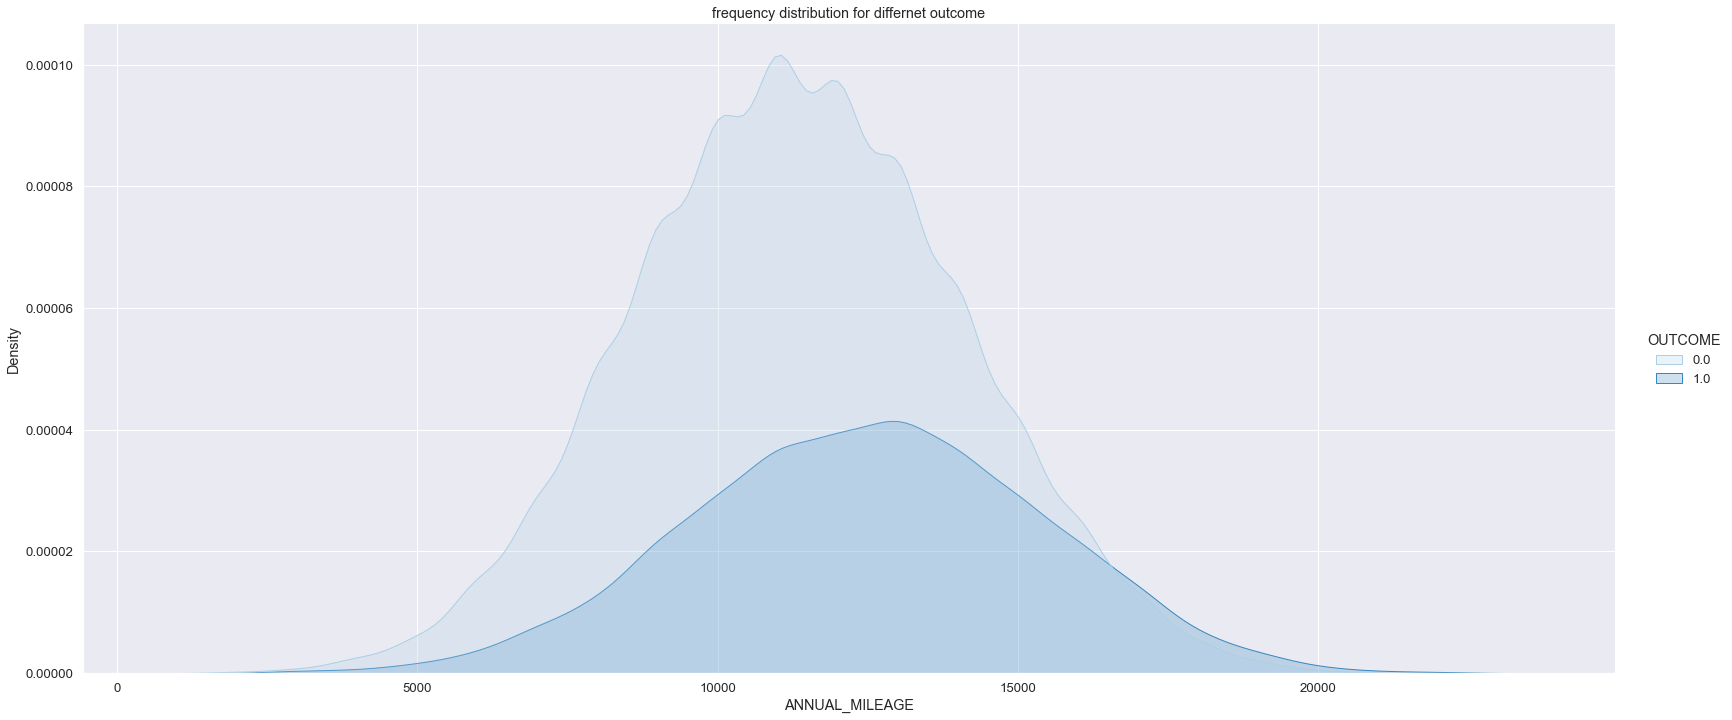

In [15]:
pic_1 = sns.displot(df, x="ANNUAL_MILEAGE", hue="OUTCOME",
            kind="kde",height=10, aspect = 2.3, palette = "Blues",fill=True)
plt.title("frequency distribution for differnet outcome")

Text(0.5, 1.0, 'frequency distribution for differnet outcome')

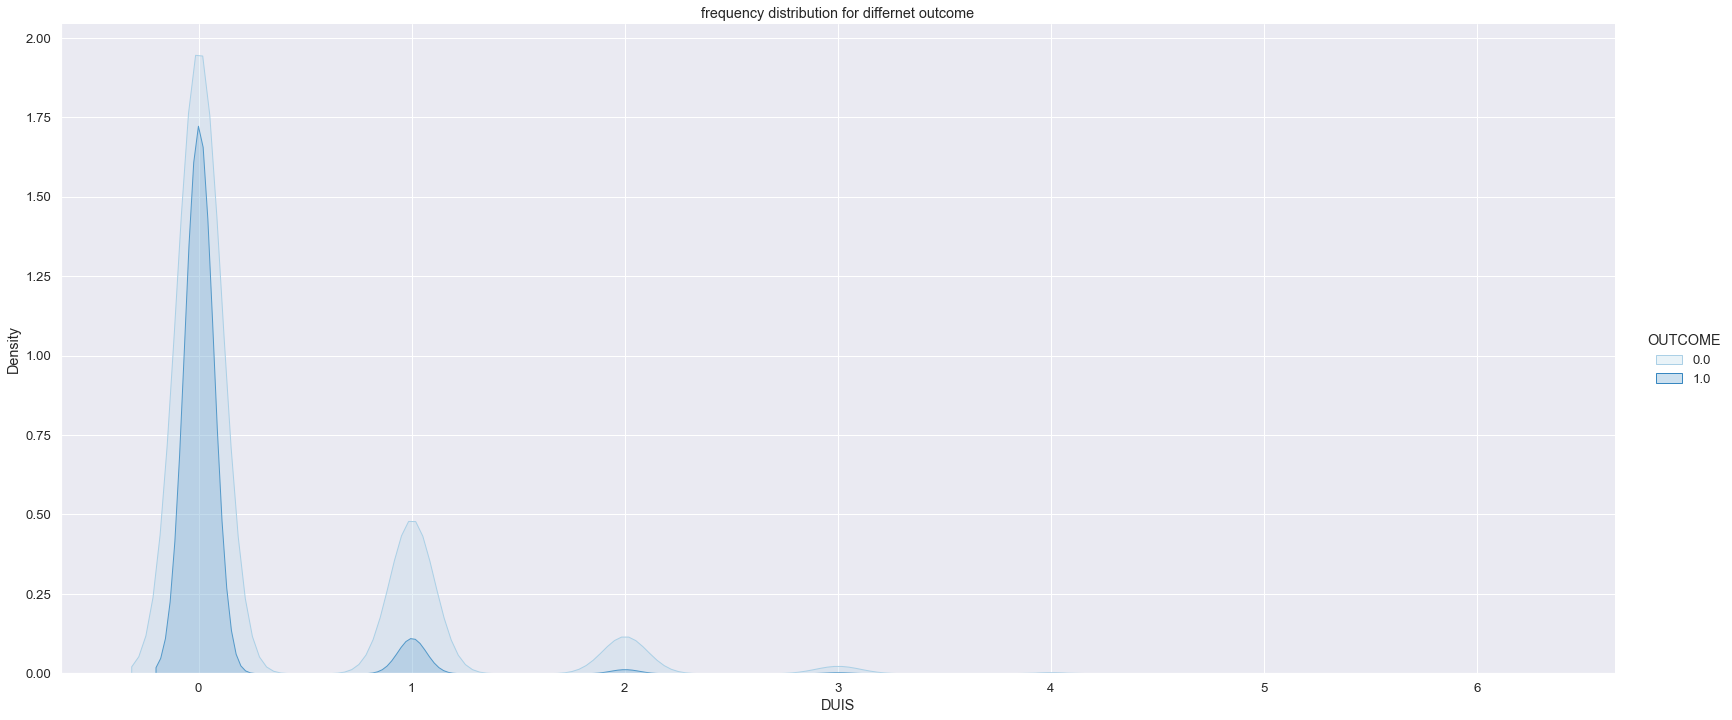

In [16]:
pic_1 = sns.displot(df, x="DUIS", hue="OUTCOME",
            kind="kde",height=10, aspect = 2.3, palette = "Blues",fill=True)
plt.title("frequency distribution for differnet outcome")

Text(0.5, 1.0, 'frequency distribution for differnet outcome')

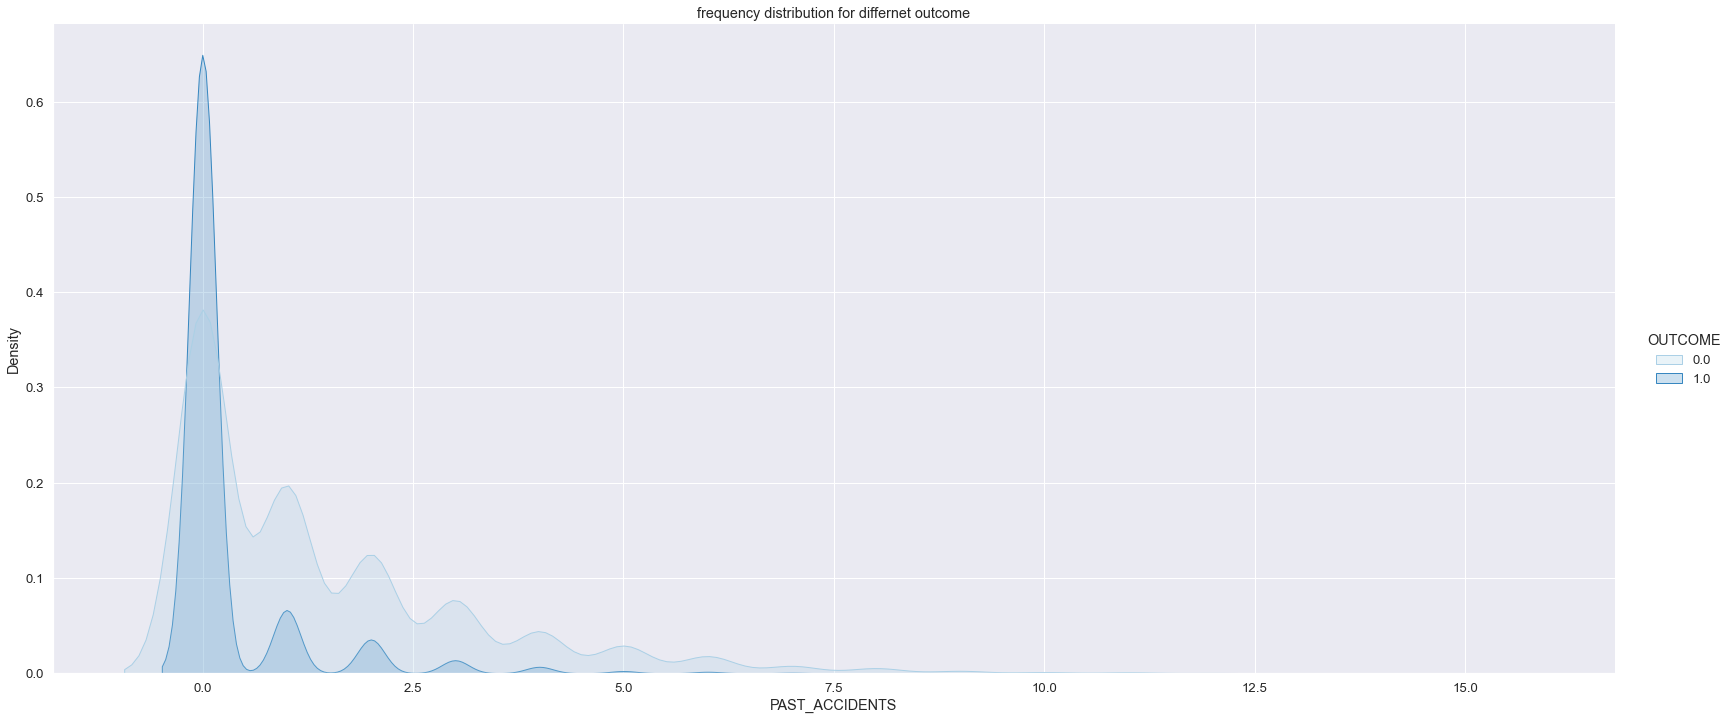

In [17]:
pic_1 = sns.displot(df, x="PAST_ACCIDENTS", hue="OUTCOME",
            kind="kde",height=10, aspect = 2.3, palette = "Blues",fill=True)
plt.title("frequency distribution for differnet outcome")